# Алгоритмы анализа данных

## Тема 2. Алгоритм линейной регрессии. Стохастический градиентный спуск.

#### Задание 1. 
Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.

In [5]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
x, y, coef = make_regression(n_samples=100, n_features = 2, n_informative = 2, n_targets = 1, 
                                              noise = 5, coef = True, random_state = 2)

In [3]:
def calculate_mse(y_true: np.array, y_pred: np.array) -> float:
    """
    Вычисление значения метрики MSE (Mean-Squared-Error).
    
    Parameters
    ----------
    y_true: np.array
        Вектор истинных ответов.
    
    y_pred: np.array
        Вектор прогнозов.
        
    Returns
    -------
    score: float
        Значение метрики качества
    
    """
    assert len(y_true) == len(y_pred)
    score = np.mean(np.square(y_true - y_pred))
    
    return score

def fit_linear_model(X: np.array,
                     y: np.array,
                     batch_size: int = 32,
                     learning_rate: float = 0.01,
                     n_iters: int = 1000,
                     tol: float = 1e-5):
    """
    Обучение линейной регрессии алгоритмом градиентного спуска.
    
    Parameters
    ----------
    X: np.array
        Матрица признаков для обучения.
        
    y: np.array
        Вектор целевой переменной для обучения.
    
    batch_size: int, optional, default = 32
        Размер батча для одной итерации оптимизатора.
        Опциональный параметр, по умолчанию равен 32.
        
    n_iters: int, optional, default = 1000
        Количество итерация обучения. Опциональный параметр,
        по умолчанию равен 1000.
    
    tol: float, optional, default = 1e-5
        Минимальное значение изменения ошибки, при котором
        обучение продолжается. Если изменение ошибки на соседних
        итерациях меньше указанной величины, то обучение прекращается.
        
    Returns
    -------
    weights: np.array
        Вектор весов линейной модели.
        
    weights_history: List[np.array]
        Список с векторами весов на каждой итерации обучения.
        
    errors_history: Llist[float]
        Список со значениями ошибки на каждой итерации обучения.
    
    """
    weights = np.random.randn(X.shape[1])
    errors_history, weights_history = [], [weights]
    n_batches = len(y) // batch_size
    
    if len(y) % batch_size:
        n_batches += 1
        
    for n_iter in tqdm(range(n_iters)):
        for batch_number in range(n_batches):
            x_batch = X[batch_number*batch_size:(batch_number+1)*batch_size]
            y_batch = y[batch_number*batch_size:(batch_number+1)*batch_size]
            
            y_pred = np.dot(weights, x_batch.T)
            current_error = calculate_mse(y_batch, y_pred)
            weights -= 2*learning_rate*np.sum(x_batch.T*(y_pred - y_batch), axis=1)/len(y_pred)
            errors_history.append(current_error)
            weights_history.append(weights)
            
        if n_iter > 2 and np.abs(current_error - errors_history[-2]) < tol:
            break
    
    return weights, weights_history, errors_history

In [6]:
# Обучение модели с помощью граиентного спуска

gd_weights, gd_weights_history, gd_errors_history = fit_linear_model(x, y, batch_size=x.shape[0])

  0%|                                                                                         | 0/1000 [00:00<?, ?it/s]


In [7]:
# Обучение модели с помощью стохастического градиентного спуска

sgd_weights, sgd_weights_history, sgd_errors_history = fit_linear_model(x, y, 
                                                                     batch_size=1)

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 145.07it/s]


(0.0, 400.0)

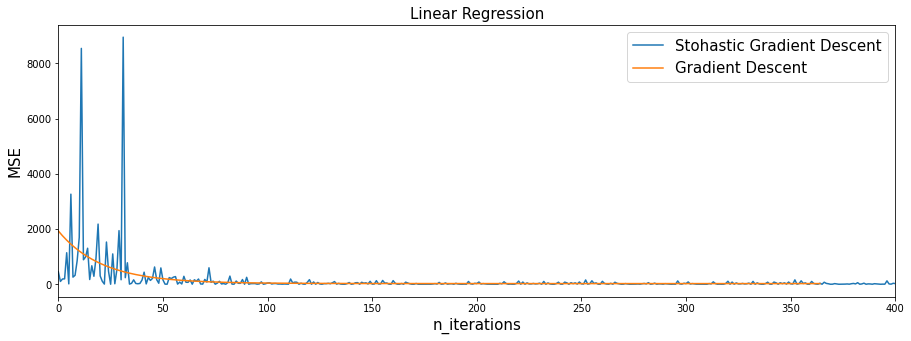

In [8]:
fig = plt.figure(figsize=(15, 5))
plt.title('Linear Regression', size=15)
plt.plot(sgd_errors_history, label='Stohastic Gradient Descent')
plt.plot(gd_errors_history, label='Gradient Descent')
plt.legend(loc='best', fontsize=15)
plt.xlabel('n_iterations', size=15)
plt.ylabel('MSE', size=15)
plt.xlim(0, 400)

Скорость сходимости у стохастического и градиентного спуска примерно одинаковая. Приблизительно к 100 итерации обе модели сошлись

#### Задание 2
Модифицировать решение первого задания путем добавления 𝐿2 -регуляризации и сравнить результаты.

In [10]:
def fit_ridge_model(X: np.array,
                    y: np.array,
                    batch_size: int = 32,
                    lambda_coef: float = 0.01, # добавили коэффициент регуляризации
                    learning_rate: float = 0.01,
                    n_iters: int = 1000,
                    tol: float = 1e-5):
    """
    Обучение Ridge-регрессии алгоритмом градиентного спуска.
    
    Parameters
    ----------
    X: np.array
        Матрица признаков для обучения.
    
    y: np.array
        Вектор целевой переменной для обучения.
    
    batch_size: int, optional, default = 32
        Размер батча для одной итерации оптимизатора.
        Опциональный параметр, по умолчанию равен 32.
    
    lambda_coef: float, optional, default = 0.01
        Коэффициент регуляризации.
        Опциональный параметр, по умолчанию равен 0.01.
    
    learning_rate: float, optional, default = 0.01
        Скорость обучения.
        Опциональный параметр, по умолчанию равен 0.01
    
    n_iters: int, optional, default = 1000
        Количество итераций обучения.
        Опциональный параметр, по умолчанию равен 1000
    
    tol: float, optional, default = 1e-5
        Минимальное значение изменения ошибки, при котором
        обучение продолжается. Если изменение ошибки на соседних
        итерациях меньше указанной величины, то обучение прекращается.
    
    Returns
    -------
    weights: np.array
        Вектор весов линейной модели.
        
    weights_history: List[np.array]
        Список с векторами весов на каждой итерации обучения.
        
    errors_history: Llist[float]
        Список со значениями ошибки на каждой итерации обучения.
    
    """
    weights = np.random.randn(X.shape[1])
    errors_history, weights_history = [], [weights]
    n_batches = len(y) // batch_size
    
    if len(y) % batch_size:
        n_batches += 1
        
    for n_iter in tqdm(range(n_iters)):
        for batch_number in range(n_batches):
            x_batch = X[batch_number*batch_size:(batch_number+1)*batch_size]
            y_batch = y[batch_number*batch_size:(batch_number+1)*batch_size]
            
            y_pred = np.dot(weights, x_batch.T)
            current_error = calculate_mse(y_batch, y_pred)
            weights -= 2*learning_rate*(np.sum(x_batch.T*(y_pred - y_batch), axis=1)/len(y_pred) + 2*lambda_coef*np.sum(weights)) # модифицировали функцию обновления весов
            errors_history.append(current_error)
            weights_history.append(weights)
            
        if n_iter > 2 and np.abs(current_error - errors_history[-2]) < tol:
            break
    
    return weights, weights_history, errors_history

In [11]:
# Обучение модели с градиентным спуском и с L2 регуляризацией

np.random.seed(27)
gd_ridge_weights, gd_ridge_weights_history, gd_ridge_errors_history = fit_ridge_model(x, y, batch_size=x.shape[0])

  0%|                                                                                         | 0/1000 [00:00<?, ?it/s]


In [12]:
# Обучение модели со стахостическим градиентным спуском и с L2 регуляризацией

np.random.seed(27)
sgd_ridge_weights, sgd_ridge_weights_history, sgd_ridge_errors_history = fit_ridge_model(x, y, 
                                                                     batch_size=1)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 94.37it/s]


(0.0, 400.0)

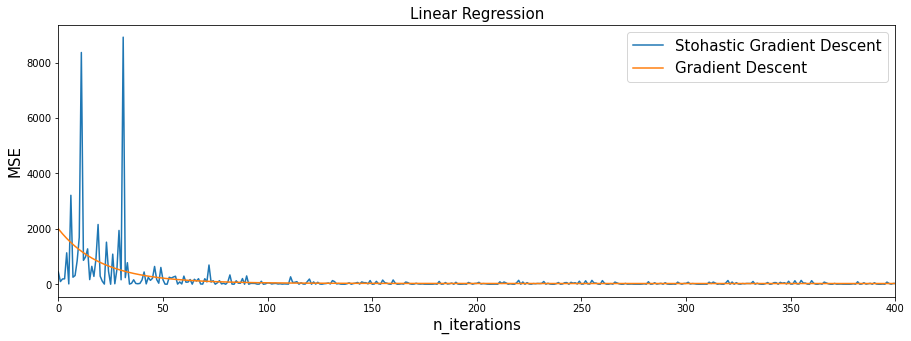

In [13]:
fig = plt.figure(figsize=(15, 5))
plt.title('Linear Regression', size=15)
plt.plot(sgd_ridge_errors_history, label='Stohastic Gradient Descent')
plt.plot(gd_ridge_errors_history, label='Gradient Descent')
plt.legend(loc='best', fontsize=15)
plt.xlabel('n_iterations', size=15)
plt.ylabel('MSE', size=15)
plt.xlim(0, 400)

Сходимости также примерно одинаковая

Сравнение сходимости 4 моделей с L2-регуляризацией и без нее

(0.0, 400.0)

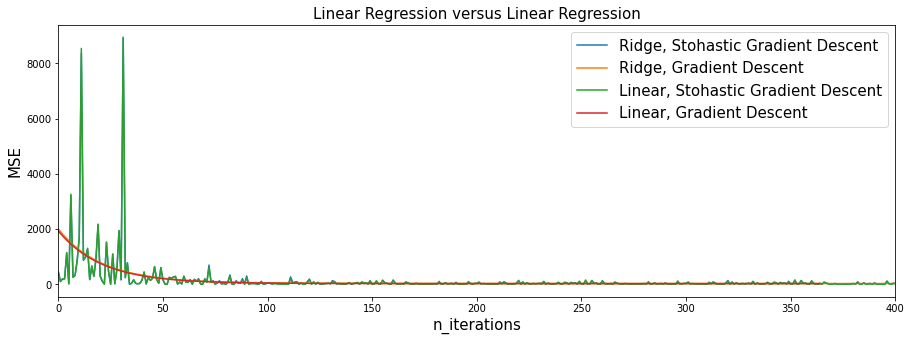

In [14]:
fig = plt.figure(figsize=(15, 5))
plt.title('Linear Regression versus Linear Regression', size=15)
plt.plot(sgd_ridge_errors_history, label='Ridge, Stohastic Gradient Descent')
plt.plot(gd_ridge_errors_history, label='Ridge, Gradient Descent')
plt.plot(sgd_errors_history, label='Linear, Stohastic Gradient Descent')
plt.plot(gd_errors_history, label='Linear, Gradient Descent')
plt.legend(loc='best', fontsize=15)
plt.xlabel('n_iterations', size=15)
plt.ylabel('MSE', size=15)
plt.xlim(0, 400)

Сходимость у всех 4 моделей примерно одинаковая. Это может объясняться маленьким набором искусственных данных. На реальных даннах различия были бы видны более четко